## Missing data and aggregations
- in real world data, there will be missing or unwanted data

In [6]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 10

#create dummy data
random_matrix = np.random.randint(1,10, [n,n]) #2D array
index = np.random.choice(random_matrix.size, 10, replace=False)
print(index)
random_matrix = random_matrix*1.0 # converts from int to float
random_matrix.ravel()[index] = None

[ 9 84  6 39 92 33 68 85 20 17]


In [12]:
scores = pd.DataFrame(random_matrix, 
                        index=[f"Player{i}" for i in range(1,n+1)],
                        columns=[f"round {i}" for i in range(1,n+1)]
                        )
scores.head()

,round 1,round 2,round 3,round 4,round 5,round 6,round 7,round 8,round 9,round 10
Player1,7.0,4.0,8.0,5.0,7.0,3.0,NaN,8.0,5.0,NaN
Player2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,NaN,2.0,5.0
Player3,NaN,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player4,3.0,7.0,5.0,NaN,7.0,2.0,4.0,9.0,2.0,NaN
Player5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0


In [13]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Player1 to Player10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   round 1   9 non-null      float64
 1   round 2   10 non-null     float64
 2   round 3   9 non-null      float64
 3   round 4   9 non-null      float64
 4   round 5   9 non-null      float64
 5   round 6   9 non-null      float64
 6   round 7   9 non-null      float64
 7   round 8   9 non-null      float64
 8   round 9   9 non-null      float64
 9   round 10  8 non-null      float64
dtypes: float64(10)
memory usage: 880.0+ bytes


## Missing value methods
- isnull() # returns True if null 
- notnull() # returns True if not null
- dropna() # drops an axis with nulls 
- fillna() # fills the null values with certain values

In [14]:
scores.isnull()

,round 1,round 2,round 3,round 4,round 5,round 6,round 7,round 8,round 9,round 10
Player1,False,False,False,False,False,False,True,False,False,True
Player2,False,False,False,False,False,False,False,True,False,False
Player3,True,False,False,False,False,False,False,False,False,False
Player4,False,False,False,True,False,False,False,False,False,True
Player5,False,False,False,False,False,False,False,False,False,False
Player6,False,False,False,False,False,False,False,False,False,False
Player7,False,False,False,False,False,False,False,False,True,False
Player8,False,False,False,False,False,False,False,False,False,False
Player9,False,False,False,False,True,True,False,False,False,False
Player10,False,False,True,False,False,False,False,False,False,False


In [16]:
scores.dropna(axis="columns")

,round 2
Player1,4.0
Player2,8.0
Player3,6.0
Player4,7.0
Player5,2.0
Player6,2.0
Player7,9.0
Player8,7.0
Player9,3.0
Player10,7.0


In [18]:
# how to treat NaNs?
# depends on the situation
# many times need to talk to domain experts
scores.fillna(0) # in this case - may be reasonable to give 0 scores for missing value (NaN)

,round 1,round 2,round 3,round 4,round 5,round 6,round 7,round 8,round 9,round 10
Player1,7.0,4.0,8.0,5.0,7.0,3.0,0.0,8.0,5.0,0.0
Player2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,0.0,2.0,5.0
Player3,0.0,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player4,3.0,7.0,5.0,0.0,7.0,2.0,4.0,9.0,2.0,0.0
Player5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,0.0,1.0
Player8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player9,3.0,3.0,1.0,5.0,0.0,0.0,7.0,9.0,8.0,2.0
Player10,1.0,7.0,0.0,8.0,5.0,3.0,8.0,6.0,3.0,1.0


## Missing value strategy

Strategy depends on:
- dataset size
- valuable information (some rows, some columns)
- percentage missing values
- domain knowledge (data analysts work with a lot of different data types)
- missing values can impact:
    - data visualization
    - arithmetic computations
    - summary statistics
    - machine learning algorithms
    

In [3]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

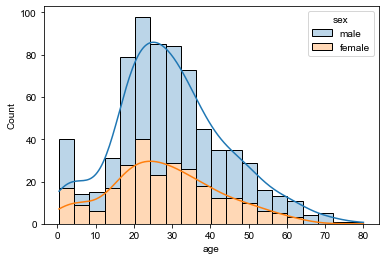

In [14]:
# focus on Age
sns.histplot(data=titanic, x="age", kde=True, hue="sex", alpha=.3, multiple="stack")
sns.set_theme()

In [27]:
# talked to a titanic historian
# this dude says: use median age of corresponding gender to fill in ages
import numpy as np

print(f"number of males {np.sum(titanic['sex'] == 'male')}")
print(f"number of females {np.sum(titanic['sex'] == 'female')}")

median_male_age = titanic.loc[titanic["sex"] == "male", "age"].median()
median_female_age = titanic.loc[titanic["sex"] == "female", "age"].median()

median_female_age, median_male_age

number of males 577
number of females 314


(27.0, 29.0)

In [34]:
titanic.loc[titanic["sex"]=="male", "age"] = titanic.loc[titanic["sex"]=="male", "age"].fillna(median_male_age)  # accessing column of male ages, fills NaN with median age
titanic.loc[titanic["age"]==29, "sex"].value_counts()


male      137
female      7
Name: sex, dtype: int64

In [37]:
titanic.isnull().sum()["age"]

53

In [40]:
titanic.loc[titanic["sex"]=="female", "age"] = titanic.loc[titanic["sex"]=="female", "age"].fillna(median_female_age)
titanic.loc[titanic["age"]==27, "sex"].value_counts()

female    59
male      12
Name: sex, dtype: int64

In [41]:
titanic.isnull().sum().age

0

<AxesSubplot:xlabel='age', ylabel='Count'>

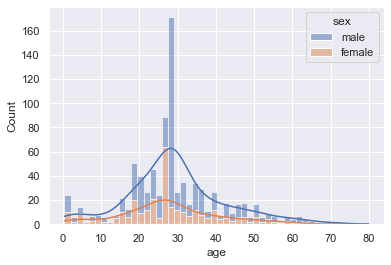

In [45]:
sns.histplot(data=titanic, x="age", kde=True, hue="sex", bins=50, multiple="stack")

In [46]:
# groupby
titanic.groupby("sex").mean() 

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.761146,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.355581,0.429809,0.235702,25.523893,0.930676,0.712305


In [48]:
titanic.groupby("sex").mean()[["survived", "age"]]

,survived,age
sex,,
female,0.742038,27.761146
male,0.188908,30.355581
